<center> <h2> 3° Desafío entregable </h2> </center>

## Estructurando un Proyecto de DS (parte I)
### Comisión 32845
* **Tutor:** Anahí García
* **Alumno:** Carlos Alarcón Villegas

**Importar librerías**

In [84]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

## **1. Predicción de un derrame cerebral.**

Un **derrame cerebral** ocurre cuando se interrumpe el flujo sanguíneo al cerebro. Pocos minutos después, que se produce un derrame cerebral, las **células del cerebro comienzan a morir** lo que puede causar daños a largo plazo. 

<br>

**Algunos números de la Organización Mundial de la Salud:**
* En el mundo, 1 de cada 6 personas tendrá un derrame cerebral en su vida. 
* Cada año, 15 millones de personas lo experimentan y 6 millones de personas no sobreviven. 
* La mayoría de personas que padecen un derrame cerebral tendrán una discapacidad residual.

<br>

Los factores de riesgo son comportamientos o rasgos que hacen más propenso a desarrollar una enfermedad o afección. Muchos de los factores de riesgo pueden ser tratados, modificados o controlados. Sin embargo, algunos factores de reisgo para el derrame cerebral no pueden ser cambiados. 

<br>

El factor principal de riesgo relacionado con el derrame cerebral que puede ser tratado es la presión arterial. En la tabla, corresponde a la columna **"hypertension"**. La presión arterial alta no causa signos ni síntomas, por eso es importante tomarsela regularmente. 

<br>

Para el análisis, también se tendrá en cuenta si el individuo cuenta con diabetes. La diabetes aumenta el riesgo de accidente, especialmente para derrames cerebrales debido al daño de pequeños vasos sanguíneos. En este caso, pondremos atención en la columna **"avg_glucose_level"** y contemplaremos tres escenarios de acuerdo con el nivel de azúcar en la sangre: 
1. Valores menores a 99 mg/dl son normales.
2. Valores entre 100 a 125 mg/dl indican que el individuo tiene pre-diabetes.
3. Valores mayores a 126 mg/dl indican que tiene diabetes. 

<br>

Contemplaremos la edad de las personas, correspondiente a la columna **"age"**, ya que individuos de 50 años o mayores corren un riesgo más alto de sufrir un accidente cerebrovascular que las personas más jóvenes. 

<br>

Y por último, se tendrá en cuenta si en el pasado ha tenido un derrame cerebral. Por lo que, se pondrá atención en la columna **"stroke"**. 




### Carga del archivo

In [85]:
df_derrame = pd.read_excel('C:\\Users\\alarc/DataSets - CoderHouse DataScience/Stroke Prediction Dataset.xlsx')
df_derrame = df_derrame.sort_values(by='id')
df_derrame= df_derrame.set_index("id")

### Fuente del dataset:
* https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### Data cleansing:

* **Filas que contienen al menos un valor "NaN":**

In [86]:
df_derrame = df_derrame.dropna()
#Se eliminan aquellas filas en donde haya un valor "NaN"

* **Edades superiores a los 100 años:**

In [87]:
df_derrame = df_derrame [df_derrame ['age'] <= 100]
#Se eliminan aquellas filas en donde la edad supere los 100 años.
#En total, fueron 60 filas. Cabe destacar que inicialmente, la máxima edad 
#registrada era 180 años. 

**1.1 Validamos la carga del archivo mediante la impresión de las primeras 5 filas**

In [88]:
df_derrame.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
77,Female,13,0,0,No,children,Rural,85.81,18.6,Unknown,0
84,Male,55,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
91,Female,42,0,0,No,Private,Urban,98.53,18.5,never smoked,0
99,Female,31,0,0,No,Private,Urban,108.89,52.3,Unknown,0
129,Female,24,0,0,No,Private,Urban,97.55,26.2,never smoked,0


**1.2 Se genera un Shape para validar las dimensiones del DataSet**

In [89]:
df_derrame.shape

(4853, 11)

**1.3 Validamos las columnas y el tipo de formato de c/columna**

In [90]:
df_derrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4853 entries, 77 to 72940
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4853 non-null   object 
 1   age                4853 non-null   int64  
 2   hypertension       4853 non-null   int64  
 3   heart_disease      4853 non-null   int64  
 4   ever_married       4853 non-null   object 
 5   work_type          4853 non-null   object 
 6   Residence_type     4853 non-null   object 
 7   avg_glucose_level  4853 non-null   float64
 8   bmi                4853 non-null   float64
 9   smoking_status     4853 non-null   object 
 10  stroke             4853 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 455.0+ KB


**1.4 Descripción de las variables númericas**

In [91]:
df_derrame.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4853.000000,4853.000000,4853.000000,4853.000000,4853.000000,4853.000000
mean,43.747373,0.092932,0.050072,105.457643,29.010303,0.043066
std,21.972657,0.290367,0.218116,44.553650,7.818009,0.203027
min,1.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,26.000000,0.000000,0.000000,77.120000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.710000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.640000,33.100000,0.000000
max,88.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Gráficos realizados:

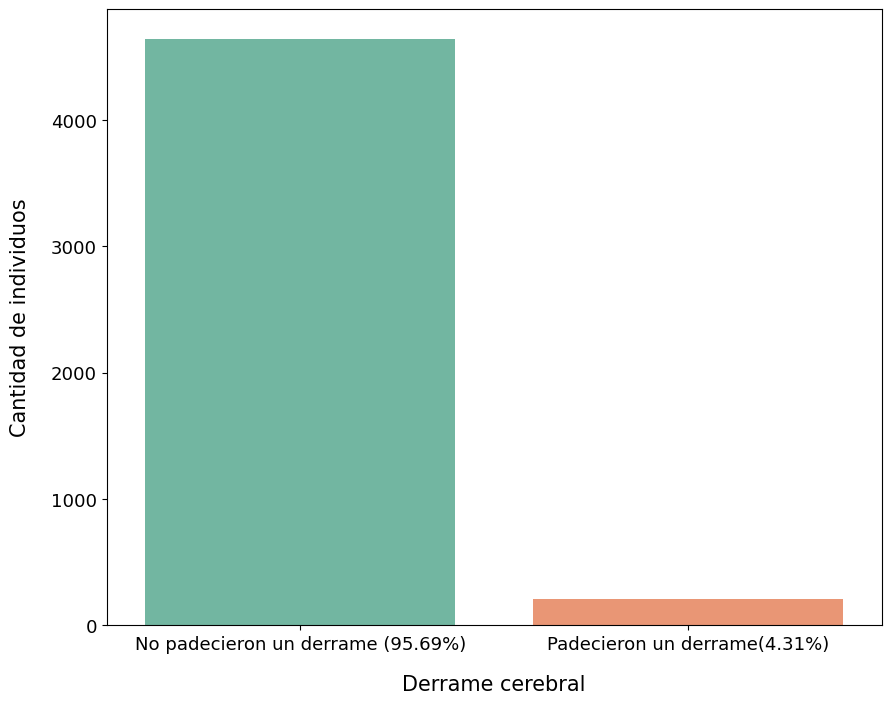

En sintesís:

209 de 4853 tuvo un derrame cerebral, es decir un 4.31%
4644 de 4853 no tuvo un derrame cerebral, es decir un 95.69%


In [92]:
#Empleando Seaborn
derrame = df_derrame['stroke'].value_counts(normalize=False, sort=True, ascending=False, bins=None)[1]
sin_derrame = df_derrame['stroke'].value_counts(normalize=False, sort=True, ascending=False, bins=None)[0]

porcentaje_derrame = (derrame / df_derrame.shape[0] * 100)
porcentaje_sin_derrame = (sin_derrame / df_derrame.shape[0] * 100)

plt.figure(figsize=(10, 8))
sns.countplot(x='stroke', data=df_derrame, palette = "Set2")

plt.xlabel('Derrame cerebral', size=15, labelpad=15)
plt.ylabel('Cantidad de individuos', size=15, labelpad=15)
plt.xticks((0, 1), ['No padecieron un derrame ({0:.2f}%)'.format(porcentaje_sin_derrame), 'Padecieron un derrame({0:.2f}%)'.format(porcentaje_derrame)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.show()

print ("En sintesís:")
print ("")
print('{} de {} tuvo un derrame cerebral, es decir un {:.2f}%'.format(derrame, df_derrame.shape[0], porcentaje_derrame))
print('{} de {} no tuvo un derrame cerebral, es decir un {:.2f}%'.format(sin_derrame, df_derrame.shape[0], porcentaje_sin_derrame))


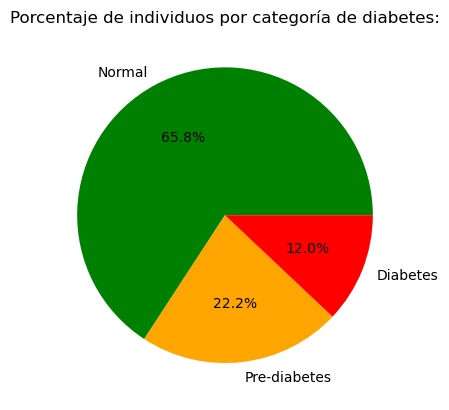

Cantidad de individuos con nivel promedio de glucosa normal:  2936

Cantidad de individuos con pre-diabetes:  989

Cantidad de individuos con diabetes:  537


In [93]:
#Empleando Matplotlib 
df_derrame['Categoría diabetes'] = pd.cut(df_derrame['avg_glucose_level'], 
                               bins=[0, 99, 125, 200], 
                               labels=['Normal', 'Pre-diabetes', 'Diabetes'])

d = df_derrame.groupby('Categoría diabetes')['avg_glucose_level'].size()/len(df_derrame)*100

colores = ['green', 'orange', 'red']
plt.pie(d, labels=d.index, autopct='%1.1f%%', colors=colores)
plt.title('Porcentaje de individuos por categoría de diabetes:')
plt.show()

print("Cantidad de individuos con nivel promedio de glucosa normal: ", (df_derrame['Categoría diabetes'] == 'Normal').sum())
print ("")
print("Cantidad de individuos con pre-diabetes: ", (df_derrame['Categoría diabetes'] == 'Pre-diabetes').sum())
print ("")
print("Cantidad de individuos con diabetes: ", (df_derrame['Categoría diabetes'] == 'Diabetes').sum())

| Categoría diabetes | Padecieron un derrame | No han tenido un derrame | Total |
|-|----------|----------| |
| **Normal** | 2844 | 92 | 2936|
| **Pre-diabetes** | 959 |30| 989|
| **Diabetes** | 499 |38|537|
|              |     |  |   |
| **Muestra** | 4302 |160|4462|

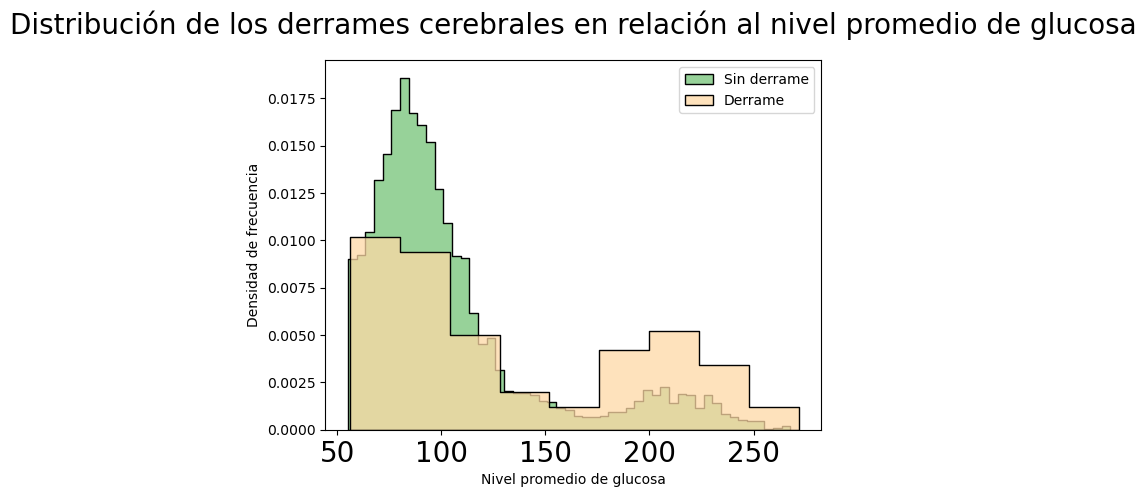

In [94]:
#Empleando Seaborn
stroke = df_derrame['stroke'] == 1

sns.histplot(data=df_derrame[~stroke], x='avg_glucose_level', 
             hue='stroke', multiple='stack', element='step', 
             stat='density', common_norm=False, 
             kde_kws={'label': 'Not Stroke'}, palette = 'Greens_r')

sns.histplot(data=df_derrame[stroke], x='avg_glucose_level', 
             hue='stroke', multiple='stack', element='step', 
             stat='density', common_norm=False, 
             kde_kws={'label': 'Stroke'}, palette = 'Pastel1_r')

plt.xlabel('Nivel promedio de glucosa')
plt.ylabel('Densidad de frecuencia')
plt.tick_params(axis='x', labelsize=20)
plt.legend(['Sin derrame','Derrame'],loc='upper right', prop={'size': 10})
plt.title('Distribución de los derrames cerebrales en relación al nivel promedio de glucosa', 
          size=20, y=1.05)

plt.show()

A medida que aumenta el nivel promedio de glucosa, se puede observar mayor registro de individuos que han sufrido un derrame cerebral en comparación de aquellos que no lo han padecido.

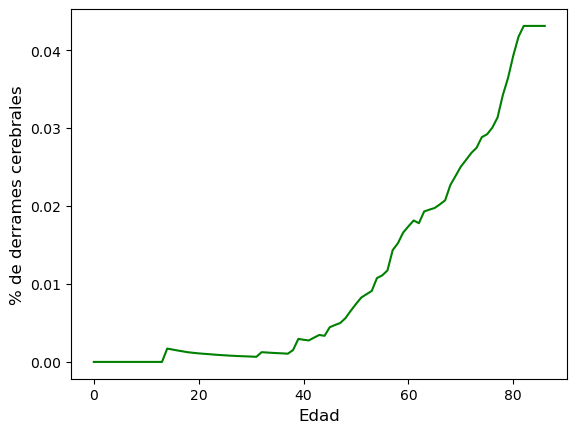

In [95]:
#Empleando Matplotlib 
edades = df_derrame['age'].astype(int)
indice = []

for i in range(edades.min(), edades.max()):
    denominador_e = len(df_derrame[edades < i]['stroke'])
    if denominador_e != 0:
        indice.append(df_derrame[edades < i]['stroke'].sum() / denominador_e)
    else:
        indice.append(0)


plt.plot(indice, color = "green")
plt.xlabel('Edad', fontsize=12)
plt.ylabel('% de derrames cerebrales', fontsize=12)
plt.show()

Este gráfico muestra la relación entre la edad y el porcentaje de personas que han sufrido un derrame cerebral. 

Se observa que **a medida que aumenta la edad, hay un incremento en el porcentaje de personas que han sufrido un derrame.** 

**Podemos validar la premisa inicial.** Individuos de 50 años o mayores (gráficamente a partir de los 40 años) corren un riesgo más alto de sufrir un accidente cerebrovascular. 


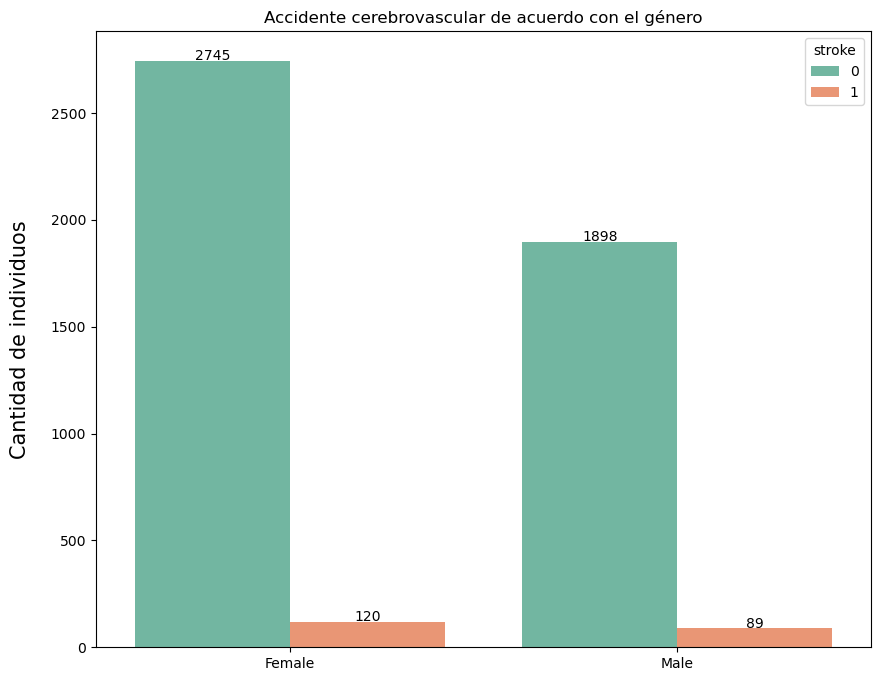

In [96]:
#Empleando Seaborn
df_derrame_ge = df_derrame[df_derrame['gender'] != 'Other']

plt.figure(figsize = (10, 8))
sns.countplot(data= df_derrame_ge, x="gender", hue="stroke",
              palette = "Set2");

plt.xlabel('', size=15, labelpad=15)
plt.ylabel('Cantidad de individuos', size=15, labelpad=15)

plt.title("Accidente cerebrovascular de acuerdo con el género")
ax = plt.gca()
for patch in ax.patches:
    if patch.get_height() > 0:
        ax.text(patch.get_x() + patch.get_width()/2, 
                patch.get_height() + 3, '{:1.0f}'.format(patch.get_height()), 
                ha="center")


El gráfico está dividido en dos barras para cada género, la barra de color verde pastel representa la cantidad de individuos que no han tenido un derrame cerebral y la otra barra representa la cantidad de individuos que si lo han padecido.  

| Género | Padecieron un derrame | No han tenido un derrame |
|-|----------|----------|
| **Masculino** | 1898 | 89 |
| **Femenino** | 2745 |120|


<center> <h3> Categorías básicas - Índice de masa corporal </h3> </center>

| Categoría | BMI (kg/m^2)| 
|----------|----------| 
| Bajo peso (delgadez severa) | < 16.0 | 
| Bajo peso (delgadez moderada)| 16.0 – 16.9|
| Bajo peso (delgadez leve)| 17.0 – 18.4 | 
| Rango normal | 18.5 – 24.9 | 
| Sobrepeso (pre-obesidad) | 	25.0 – 29.9 | 
| Obesidad (clase I)| 30.0 – 34.9 | 
| Obesidad (clase II)| 35.0 – 39.9 | 
| Obesidad (clase III)| ≥ 40.0 | 

<br>
<center> Fuente: https://en.wikipedia.org/wiki/Body_mass_index </center>


In [97]:
#Añadimos una nueva colunna que referencia a las clasifiaciones posibles de
#acuerdo con el BMI
def clasificacion (bmi):
    if bmi < 16.0:
        return "Bajo peso (delgadez severa)"
    elif bmi >= 16.0 and bmi <= 16.9:
        return "Bajo peso (delgadez moderada)"
    elif bmi >= 17.0 and bmi <= 18.4:
        return "Bajo peso (delgadez leve)"
    elif bmi >= 18.5 and bmi <= 24.9:
        return "Rango normal"
    elif bmi >= 25.0 and bmi <= 29.9:
        return "Sobrepeso (pre-obesidad)"
    elif bmi >= 30.0 and bmi <= 34.9:
        return "Obesidad (clase I)"
    elif bmi >= 35.0 and bmi <= 39.9:
        return "Obesidad (clase II)"
    else:
        return "Obesidad (clase III)"

df_derrame["Clasificación BMI"] = df_derrame["bmi"].apply(clasificacion)

contador = df_derrame["Clasificación BMI"].value_counts()
contador_dicc = contador.to_dict()

for i, j in contador_dicc.items():
    print("La categoría", i , "tiene", j, "personas")


La categoría Sobrepeso (pre-obesidad) tiene 1409 personas
La categoría Rango normal tiene 1207 personas
La categoría Obesidad (clase I) tiene 1000 personas
La categoría Obesidad (clase II) tiene 506 personas
La categoría Obesidad (clase III) tiene 414 personas
La categoría Bajo peso (delgadez leve) tiene 158 personas
La categoría Bajo peso (delgadez moderada) tiene 81 personas
La categoría Bajo peso (delgadez severa) tiene 78 personas


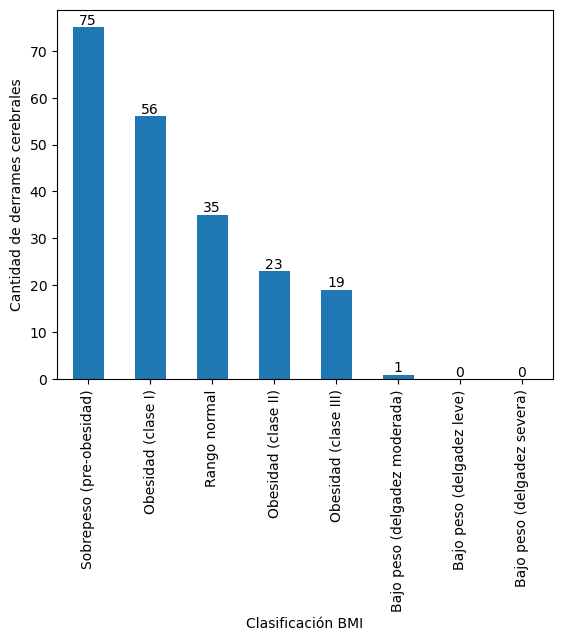

In [98]:
#Empleando Matplotlib 
df_derrame_bmi = df_derrame.groupby("Clasificación BMI")["stroke"].sum()

df_derrame_bmi = df_derrame_bmi.sort_values(ascending=False)
ax = df_derrame_bmi.plot(kind='bar', xlabel='Clasificación BMI', ylabel='Cantidad de derrames cerebrales')
for i in ax.containers:
    ax.bar_label(i,)


plt.show()

In [99]:
df_auxiliar_bmi = pd.DataFrame(columns=["Cantidad de personas por categoría", "Cantidad que padeció un derrame cerebral"])

df_contador = df_derrame.groupby("Clasificación BMI").size().reset_index(name='Cantidad de personas por categoría')
df_derrame_aux = df_derrame.groupby("Clasificación BMI")["stroke"].sum().reset_index(name='Cantidad que padeció un derrame cerebral')


df_auxiliar_bmi = pd.merge(df_contador, df_derrame_aux, on='Clasificación BMI')
df_auxiliar_bmi ["Porcentaje de ocurrencia de un derrame según BMI"] = df_auxiliar_bmi["Cantidad que padeció un derrame cerebral"] / df_auxiliar_bmi["Cantidad de personas por categoría"] * 100

df_auxiliar_bmi = df_auxiliar_bmi.set_index("Clasificación BMI")
df_auxiliar_bmi = df_auxiliar_bmi.sort_values(by=["Porcentaje de ocurrencia de un derrame según BMI"], ascending=False)
df_auxiliar_bmi["Porcentaje de ocurrencia de un derrame según BMI"] = df_auxiliar_bmi["Porcentaje de ocurrencia de un derrame según BMI"].apply(lambda x: "{:.2f}%".format(x))

df_auxiliar_bmi

,Cantidad de personas por categoría,Cantidad que padeció un derrame cerebral,Porcentaje de ocurrencia de un derrame según BMI
Clasificación BMI,,,
Obesidad (clase I),1000,56,5.60%
Sobrepeso (pre-obesidad),1409,75,5.32%
Obesidad (clase III),414,19,4.59%
Obesidad (clase II),506,23,4.55%
Rango normal,1207,35,2.90%
Bajo peso (delgadez moderada),81,1,1.23%
Bajo peso (delgadez leve),158,0,0.00%
Bajo peso (delgadez severa),78,0,0.00%


Por medio del gráfico y de la tabla, podemos validar uno de los supuestos con el que partimos. 
Las personas con un índice de masa corporal alto tiene un mayor riesgo de sufrir un derrame cerebral. 


### Tras las modificaciones realizadas, el DataFrame quedó de la siguiente forma:

In [100]:
df_derrame.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Categoría diabetes,Clasificación BMI
id,,,,,,,,,,,,,
77,Female,13,0,0,No,children,Rural,85.81,18.6,Unknown,0,Normal,Rango normal
84,Male,55,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0,Normal,Obesidad (clase I)
91,Female,42,0,0,No,Private,Urban,98.53,18.5,never smoked,0,Normal,Rango normal
99,Female,31,0,0,No,Private,Urban,108.89,52.3,Unknown,0,Pre-diabetes,Obesidad (clase III)
129,Female,24,0,0,No,Private,Urban,97.55,26.2,never smoked,0,Normal,Sobrepeso (pre-obesidad)


In [101]:
df_derrame.shape

(4853, 13)

**Es así como queda en evidencia la creación de dos nuevas columnas:**
<br>
* Categoría diabetes
* Clasificación BMI
